In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco_customer_churn.csv')

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
df['Total Charges'] = df['Total Charges'].apply(lambda x : float(x) if x != ' ' else 0)

In [7]:
for column in df:
    def unique_val(x):
        try:
            unique_val = np.unique(df[x])
            return unique_val
        except:
            unique_val = np.unique(df[x].apply(str))
            return unique_val
    unique = unique_val(column)
    nr_values = len(unique)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CustomerID :7043
The number of values for feature Count :1 -- [1]
The number of values for feature Country :1 -- ['United States']
The number of values for feature State :1 -- ['California']
The number of values for feature City :1129
The number of values for feature Zip Code :1652
The number of values for feature Lat Long :1652
The number of values for feature Latitude :1652
The number of values for feature Longitude :1651
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Senior Citizen :2 -- ['No' 'Yes']
The number of values for feature Partner :2 -- ['No' 'Yes']
The number of values for feature Dependents :2 -- ['No' 'Yes']
The number of values for feature Tenure Months :73
The number of values for feature Phone Service :2 -- ['No' 'Yes']
The number of values for feature Multiple Lines :3 -- ['No' 'No phone service' 'Yes']
The number of values for feature Internet Service :3 -- ['DSL' 'Fiber optic' 'No']

In [8]:
df['CLTV'].name

'CLTV'

In [9]:
discrete_cols = []
for column in df:
    def unique_val(x):
        unique_val = np.unique(df[x].apply(str))
        return unique_val
    unique = unique_val(column)
    if len(unique) <= 5:
        discrete_cols.append(column)


print(discrete_cols)

['Count', 'Country', 'State', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Value']


In [10]:
discrete_cols = ['Gender',
'Senior Citizen',
'Partner',
'Dependents',
'Phone Service',
'Multiple Lines',
'Internet Service',
'Online Security',
'Online Backup',
'Device Protection',
'Tech Support',
'Streaming TV',
'Streaming Movies',
'Contract',
'Paperless Billing',
'Payment Method']


In [11]:
len(discrete_cols)

16

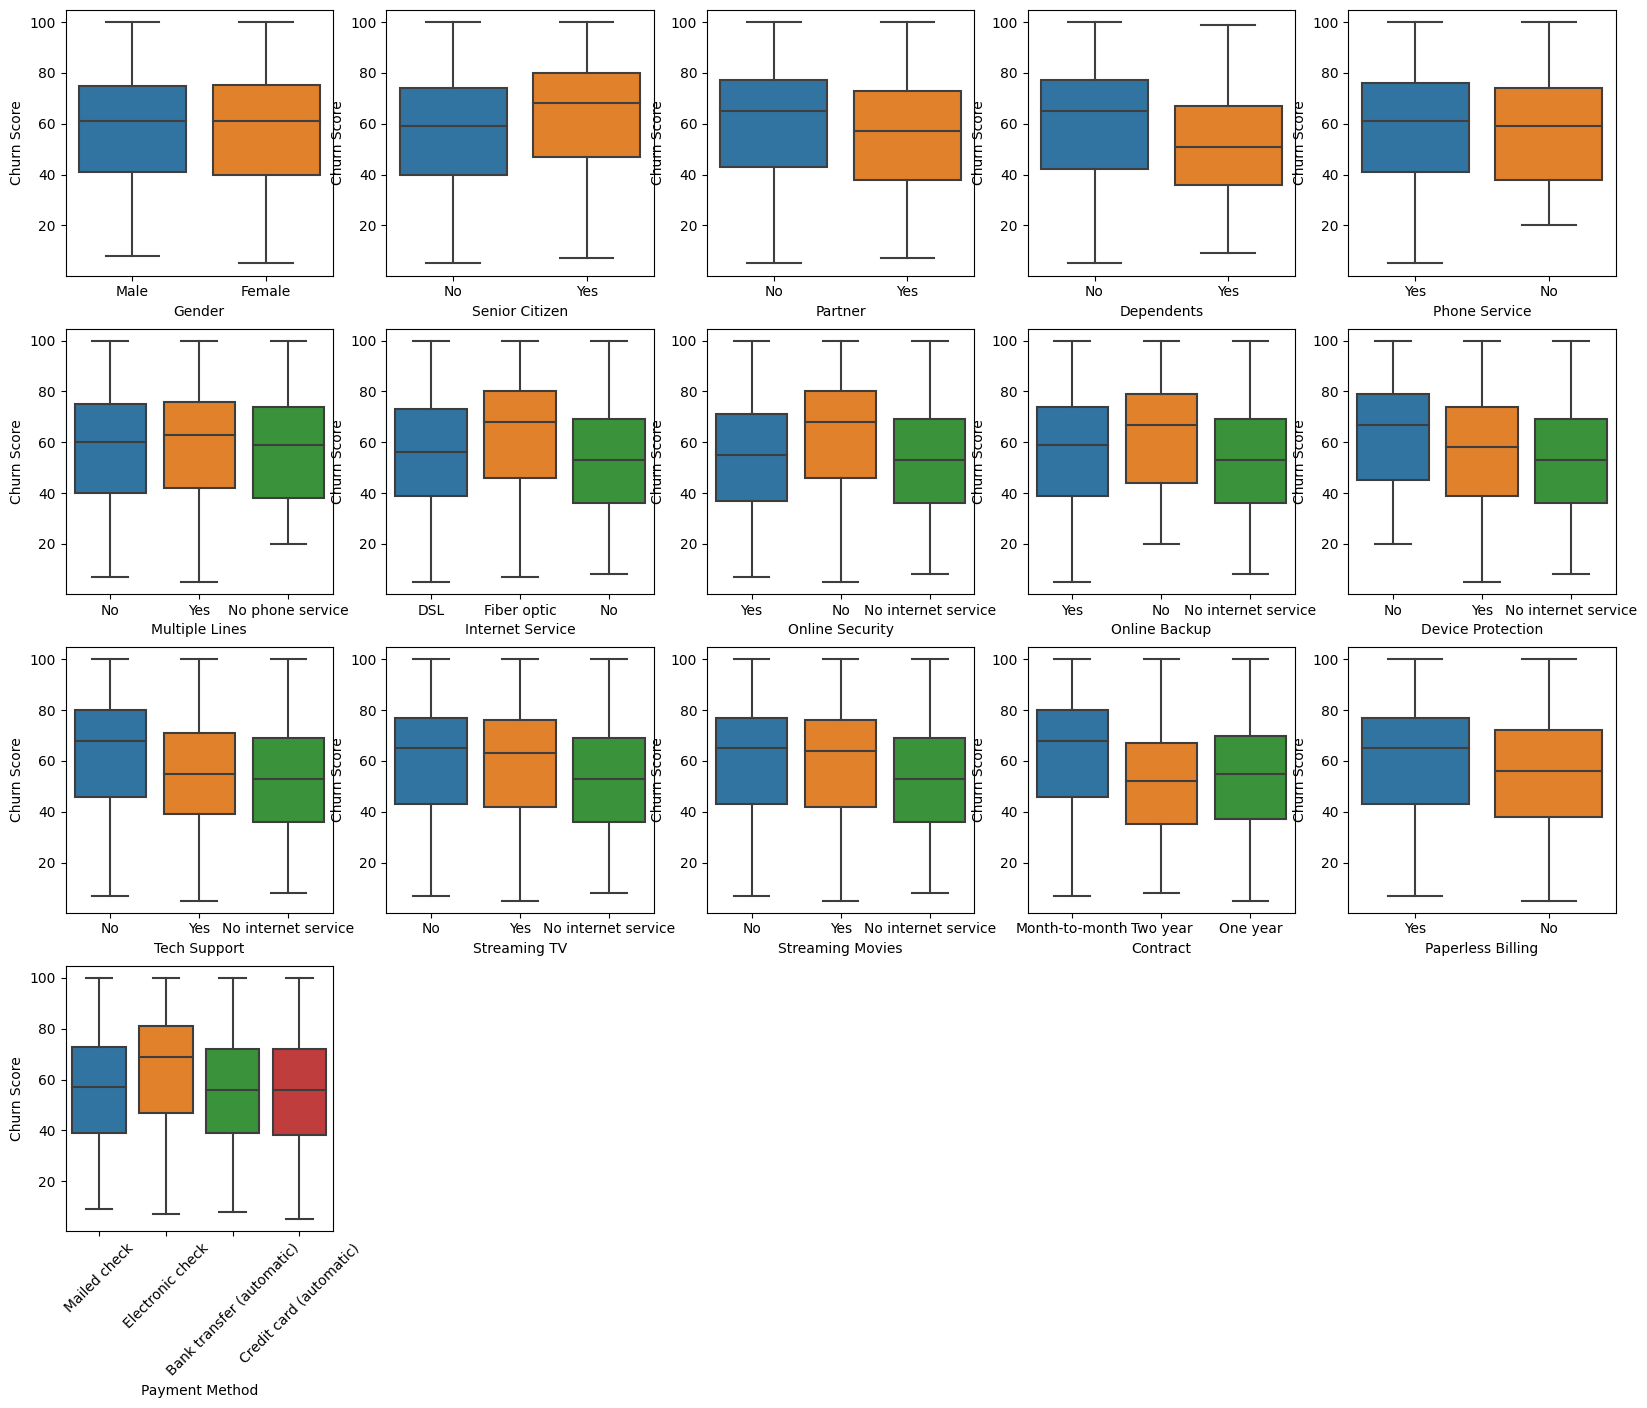

In [12]:
import seaborn as sns
# def plot_each_graph(df):
#     plt.rcParams['figure.figsize'] = [20, 16]
#     plt.rc('font', family='NanumMyeongjo')
#     fig = plt.figure(1)
#     for i in range(len(df.columns)):
#         ax = fig.add_subplot(5,5,i+1)
#         plt.hist(df[df.columns[i]], bins=50)
#         ax.set_title(df.columns[i])
#     plt.show()
# plot_each_graph(pitcher_hist)


# Churning Score by Category

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure(1)
for i in range(len(discrete_cols)):
    boxplot_df = df[[discrete_cols[i], 'Churn Score']]
    ax = fig.add_subplot(5, 5, i+1)
    sns.boxplot(x = discrete_cols[i], y = 'Churn Score', data = boxplot_df)
    if discrete_cols[i] == 'Payment Method':
        plt.xticks(rotation = 45)
plt.show()

Cities With Most Customers

In [13]:
len(df['City'].value_counts().values)

1129

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Los Angeles'),
  Text(1, 0, 'San Diego'),
  Text(2, 0, 'San Jose'),
  Text(3, 0, 'Sacramento'),
  Text(4, 0, 'San Francisco'),
  Text(5, 0, 'Fresno'),
  Text(6, 0, 'Long Beach'),
  Text(7, 0, 'Oakland'),
  Text(8, 0, 'Stockton'),
  Text(9, 0, 'Bakersfield'),
  Text(10, 0, 'Glendale'),
  Text(11, 0, 'Riverside'),
  Text(12, 0, 'Berkeley'),
  Text(13, 0, 'Whittier'),
  Text(14, 0, 'Pasadena'),
  Text(15, 0, 'Santa Barbara'),
  Text(16, 0, 'Anaheim'),
  Text(17, 0, 'San Bernardino'),
  Text(18, 0, 'Modesto'),
  Text(19, 0, 'Irvine'),
  Text(20, 0, 'Santa Monica'),
  Text(21, 0, 'Torrance'),
  Text(22, 0, 'Burbank'),
  Text(23, 0, 'Chula Vista'),
  Text(24, 0, 'Inglewood'),
  Text(25, 0, 'Santa Ana'),
  Text(26, 0, 'Santa Rosa'),
  Text(27, 0, 'Rancho Cu

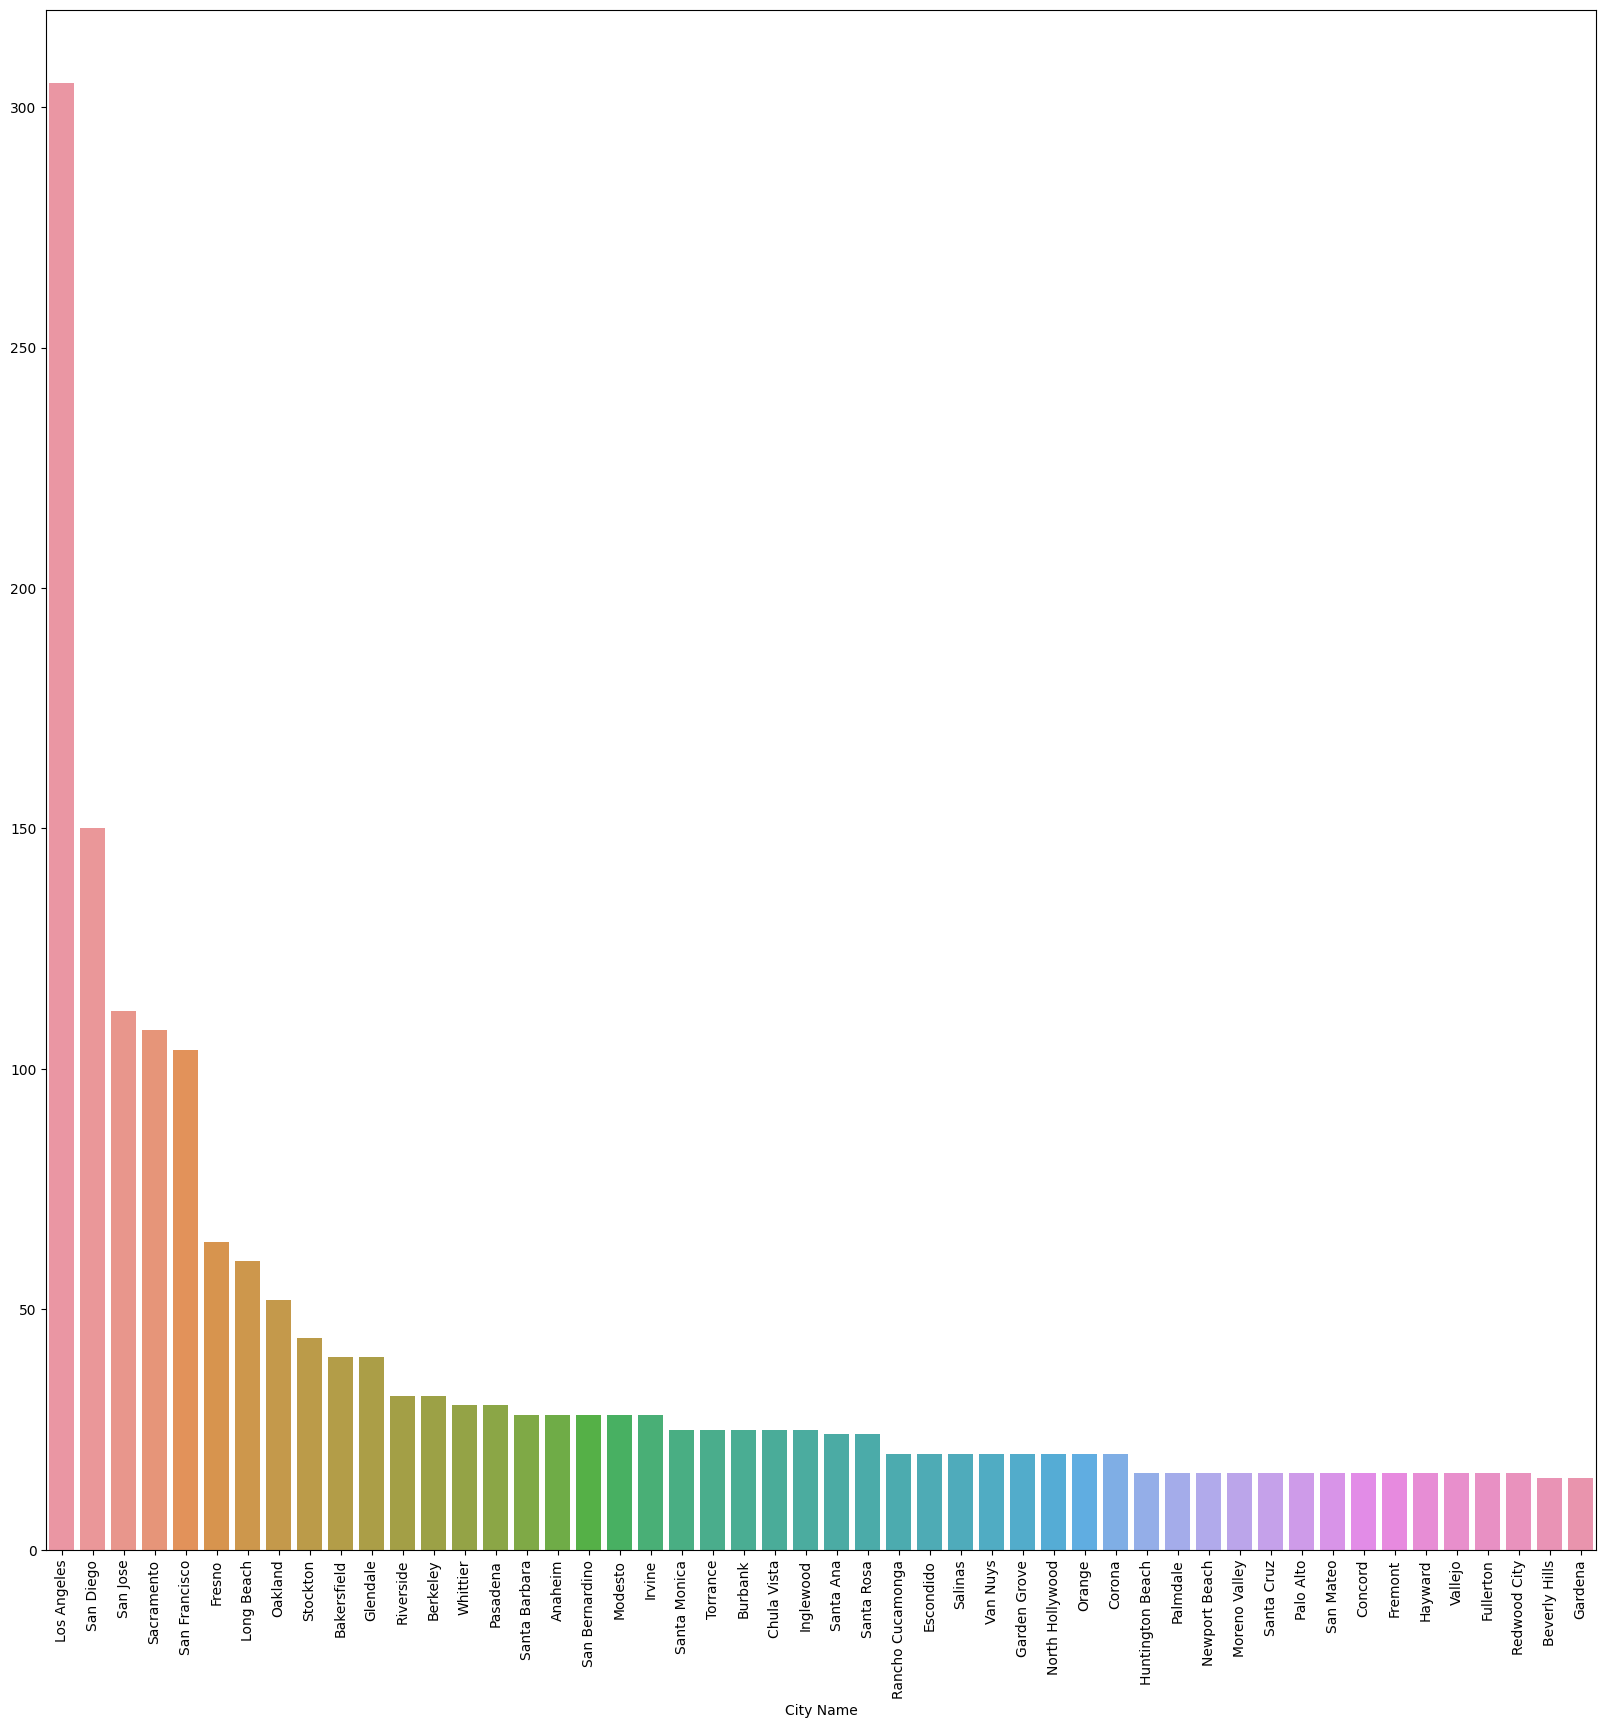

In [14]:
sns.barplot(x = df['City'].value_counts().head(50).index, y = df['City'].value_counts().head(50).values)
plt.xlabel('City Name')
plt.xticks(rotation = 90)

Churned Customers Distribution on Total Charges, Tenure

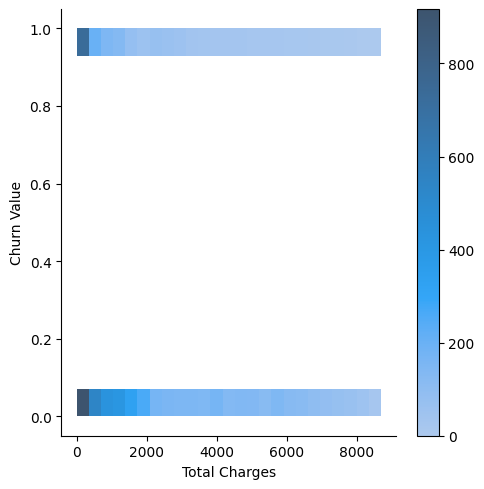

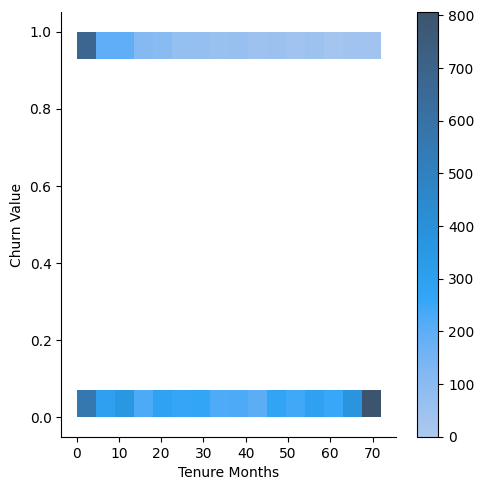

In [15]:
sns.displot(data = df, x = 'Total Charges', y = 'Churn Value', cbar = True)
sns.displot(data = df, x = 'Tenure Months', y = 'Churn Value', cbar = True)

<Figure size 1600x800 with 0 Axes>

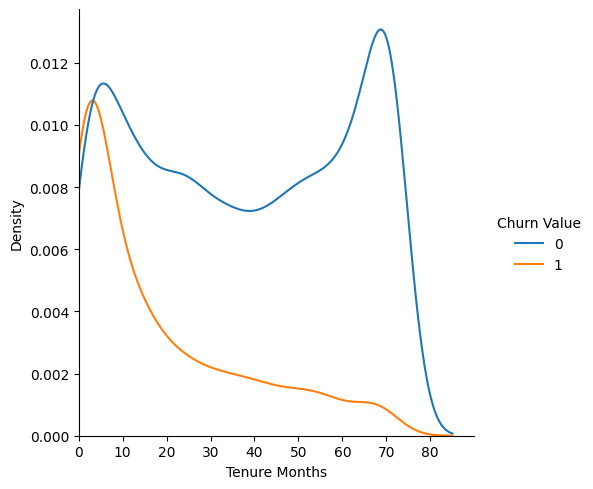

In [16]:
plt.figure(figsize = (16,8))
ax = sns.displot(data = df, x = 'Tenure Months', hue = 'Churn Value', kind = 'kde')
ax.set(xlim=(df['Tenure Months'].min(), None))

[(0.0, 89.37785429051918)]

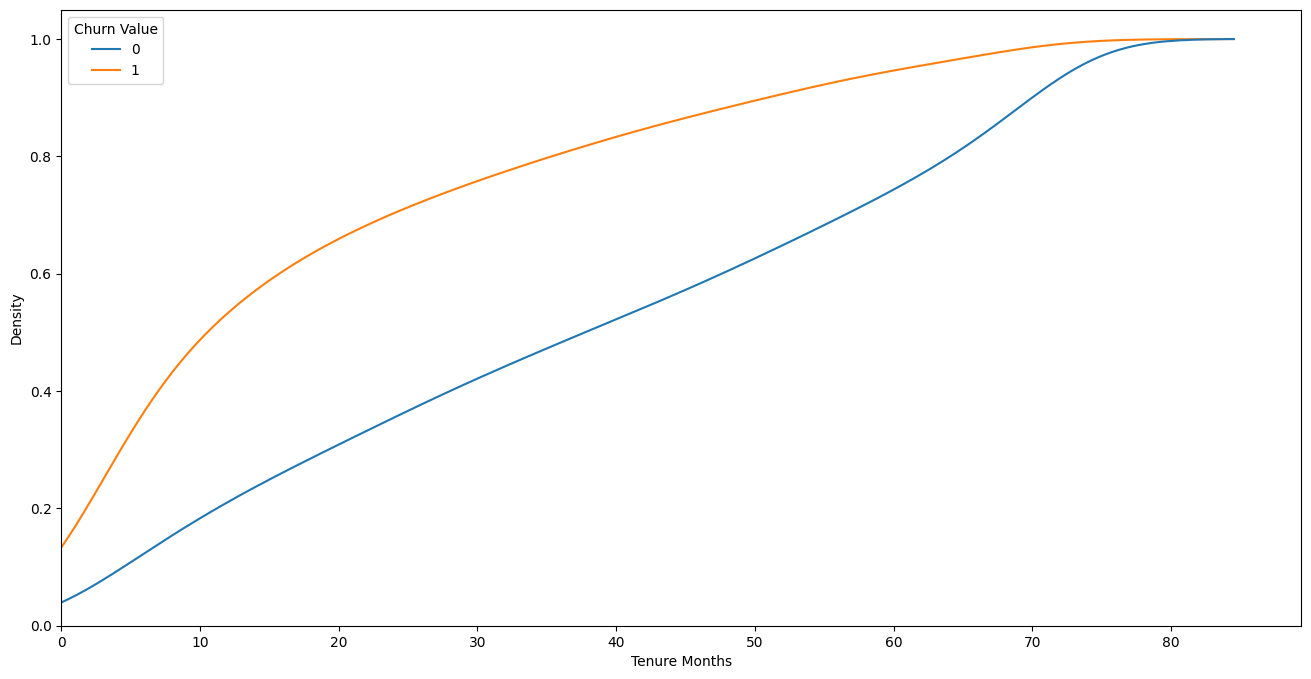

In [17]:
plt.figure(figsize = (16,8))
ax = sns.kdeplot(
    data=df, x="Tenure Months", hue="Churn Value",
    cumulative=True, common_norm=False, common_grid=True,
)

ax.set(xlim=(df['Tenure Months'].min(), None))

In [18]:
df.groupby('Churn Label')['Tenure Months'].quantile([.50,.75,.90,.95])

Churn Label      
No           0.50    38.0
             0.75    61.0
             0.90    71.0
             0.95    72.0
Yes          0.50    10.0
             0.75    29.0
             0.90    51.0
             0.95    60.0
Name: Tenure Months, dtype: float64

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
def encode_data(x):
    if x.dtype == 'object':
        x = LabelEncoder().fit_transform(x)
    return x

In [132]:
df = df.apply(lambda x : encode_data(x))

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,2564,1,0,0,562,90003,327,33.964131,-118.272783,1,...,0,1,3,53.85,157,1,1,86,3239,3
1,6511,1,0,0,562,90005,405,34.059281,-118.307420,0,...,0,1,2,70.70,925,1,1,67,2701,13
2,6551,1,0,0,562,90006,393,34.048013,-118.293953,0,...,0,1,2,99.65,6104,1,1,86,5372,13
3,5604,1,0,0,562,90010,410,34.062125,-118.315709,0,...,0,1,2,104.80,2646,1,1,84,5003,13
4,174,1,0,0,562,90015,385,34.039224,-118.266293,1,...,0,1,0,103.70,4265,1,1,89,5340,2


Correlations

In [39]:
corr_features = df.corr()['Churn Label']

# sns.barplot(x = df.corr()['Churn Label'].index, y = df.corr()['Churn Label'].values)

In [43]:
corr_features = corr_features.sort_values(ascending=False)

In [47]:
corr_features.index.to_list

<bound method IndexOpsMixin.tolist of Index(['Churn Label', 'Churn Value', 'Churn Score', 'Monthly Charges',
       'Paperless Billing', 'Senior Citizen', 'Payment Method',
       'Multiple Lines', 'Total Charges', 'Phone Service', 'City', 'Longitude',
       'Zip Code', 'Lat Long', 'Latitude', 'Gender', 'CustomerID',
       'Streaming TV', 'Streaming Movies', 'Internet Service', 'CLTV',
       'Partner', 'Device Protection', 'Online Backup', 'Dependents',
       'Tech Support', 'Online Security', 'Tenure Months', 'Contract',
       'Churn Reason', 'Count', 'Country', 'State'],
      dtype='object')>

In [53]:
len(corr_features)

30

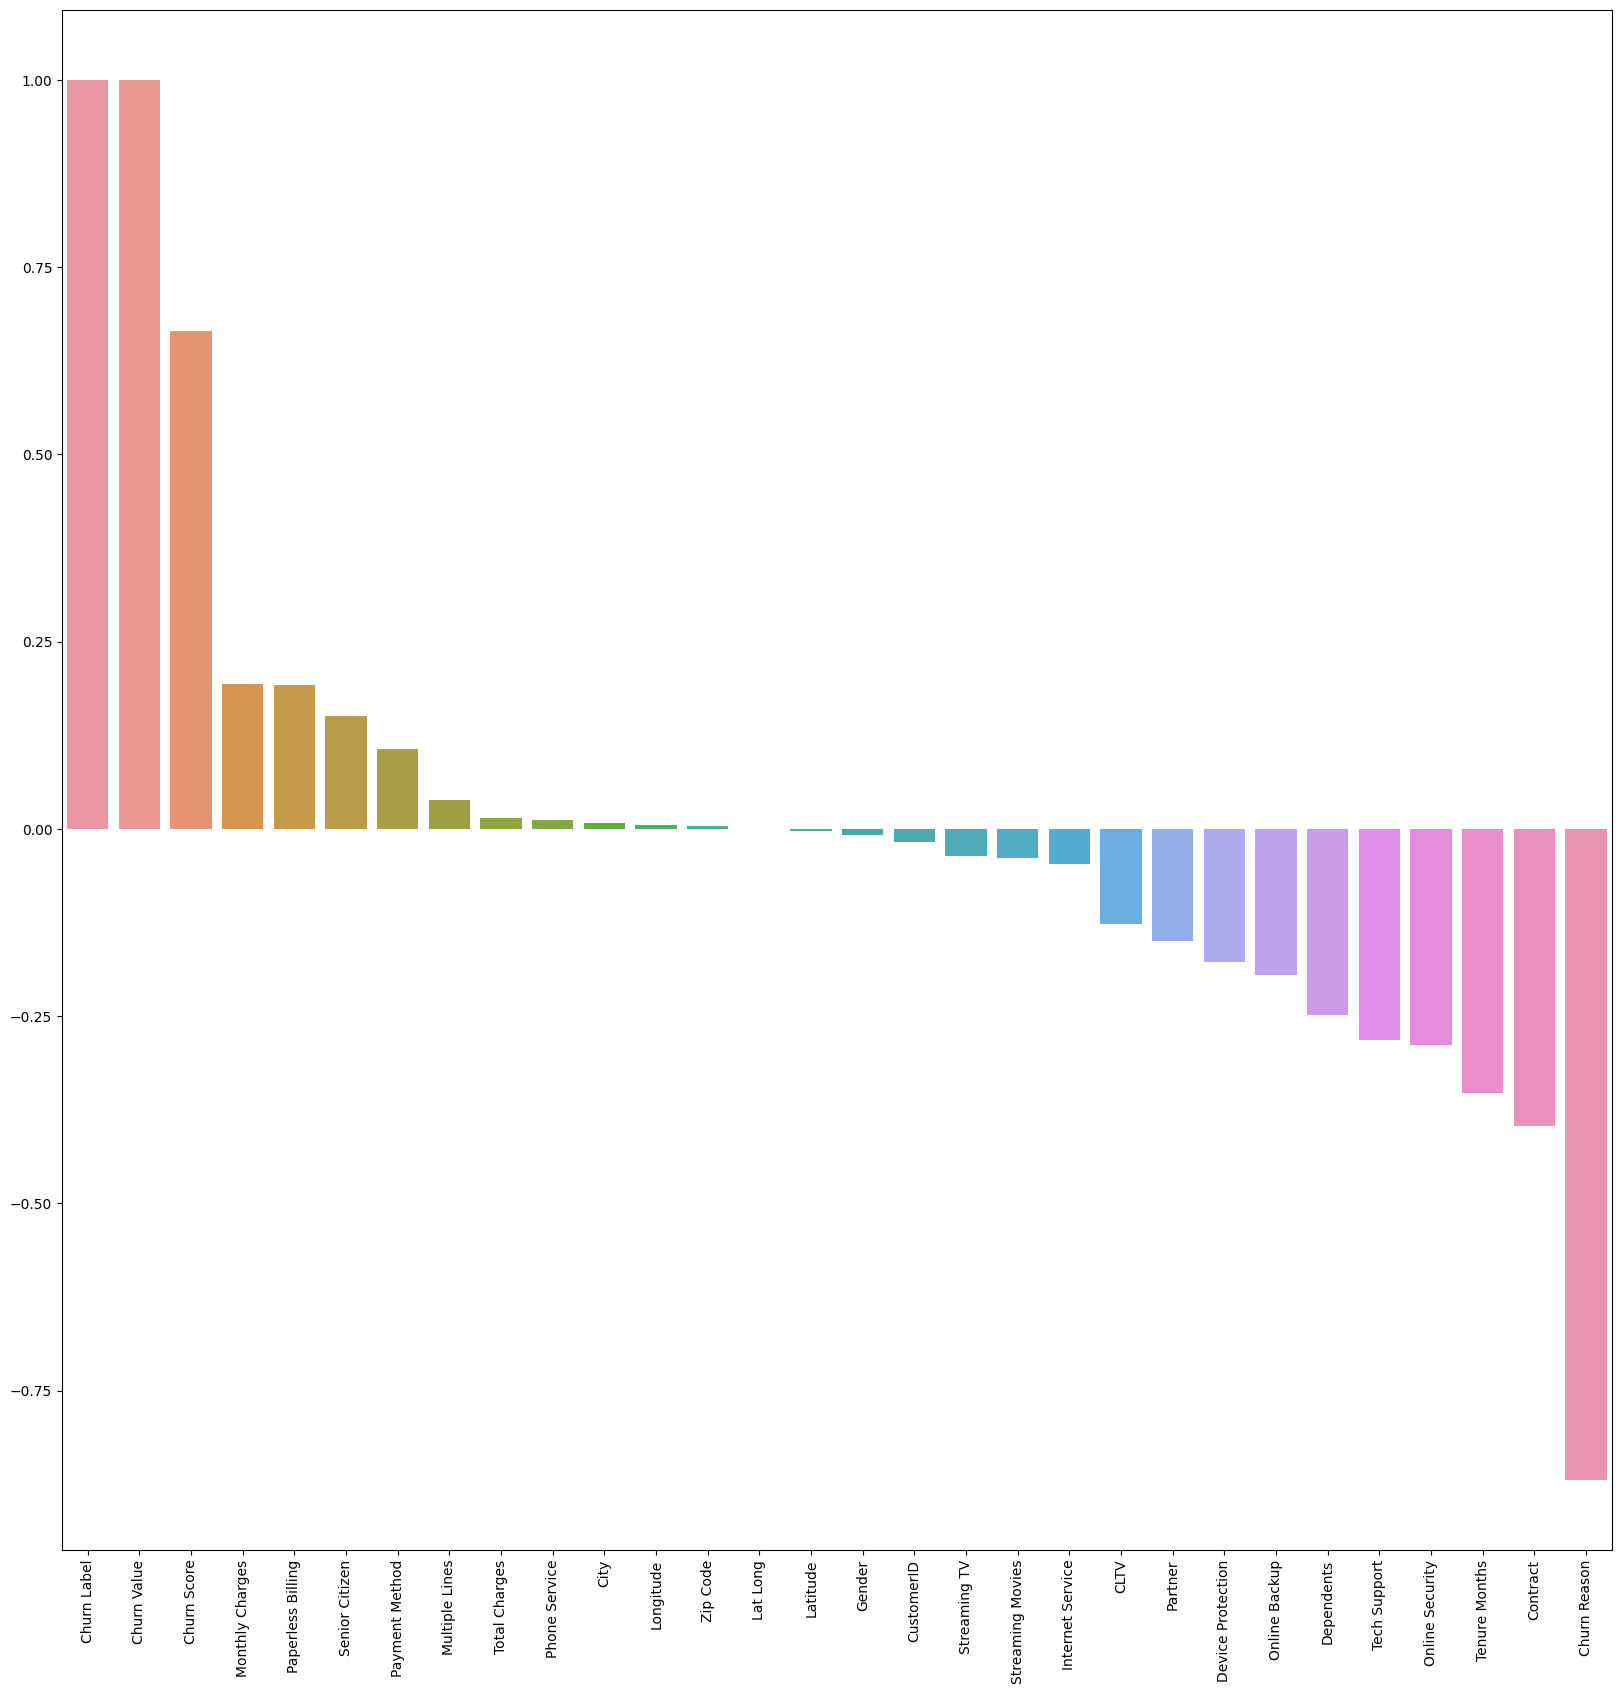

In [71]:
sns.barplot(x = corr_features.index, y = corr_features.values)
plt.xticks(rotation = 90)
# Add annotations
# for i in range(len(corr_features.index)):
#     plt.annotate(str(corr_features.values[i]), xy=(corr_features.index[i], corr_features.values[i]), ha='center', va='bottom')
plt.show()


In [70]:
df.groupby('Churn Value')['CustomerID'].count()

Churn Value
0    5174
1    1869
Name: CustomerID, dtype: int64

In [133]:
from imblearn.over_sampling import SMOTE

In [134]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [135]:
df_model = df.drop(columns = ['Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'], axis = 1)


df_model.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,2564,1,0,0,562,90003,327,33.964131,-118.272783,1,...,0,0,0,0,0,1,3,53.85,157,1
1,6511,1,0,0,562,90005,405,34.059281,-118.307420,0,...,0,0,0,0,0,1,2,70.70,925,1
2,6551,1,0,0,562,90006,393,34.048013,-118.293953,0,...,2,0,2,2,0,1,2,99.65,6104,1
3,5604,1,0,0,562,90010,410,34.062125,-118.315709,0,...,2,2,2,2,0,1,2,104.80,2646,1
4,174,1,0,0,562,90015,385,34.039224,-118.266293,1,...,2,0,2,2,0,1,0,103.70,4265,1


In [136]:
over = SMOTE(sampling_strategy= 1)


x = df_model.drop("Churn Label", axis = 1).values
y = df_model['Churn Label'].values

In [137]:
x,y = over.fit_resample(x,y)

In [138]:
np.unique(y, return_counts=True)

(array([0, 1]), array([5174, 5174]))

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =42, test_size = 0.3, stratify = y)

In [141]:
from xgboost import XGBClassifier

In [142]:
xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)


xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [143]:
prediction = xgb.predict(x_test)

In [144]:
from sklearn.metrics import confusion_matrix, classification_report

In [145]:
c_matrix = confusion_matrix(y_test, prediction)

In [146]:
c_matrix

array([[1333,  220],
       [ 198, 1354]])

In [147]:
percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100

percentages

array([[86., 14.],
       [13., 87.]])

In [149]:
c_matrix / np.sum(c_matrix, axis=1)

array([[0.8583387 , 0.14175258],
       [0.12749517, 0.87242268]])

In [150]:
[[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]

[['1333 (86.00%)', '220 (14.00%)'], ['198 (13.00%)', '1354 (87.00%)']]

In [152]:
c_matrix.shape

(2, 2)

<AxesSubplot: >

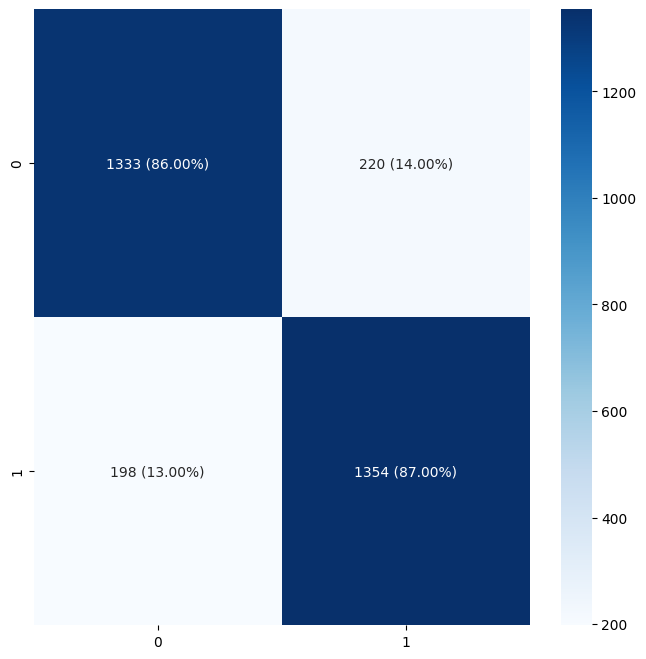

In [157]:
label = [[f"{c_matrix[i, j]} ({percentages[i,j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]


labels = np.asarray(label)

plt.figure(figsize = (8,8))
sns.heatmap(c_matrix, annot=labels, fmt = '', cmap = 'Blues')

RandomForest를 활용한 예측

In [160]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score

100%|██████████| 50/50 [00:26<00:00,  1.87it/s]


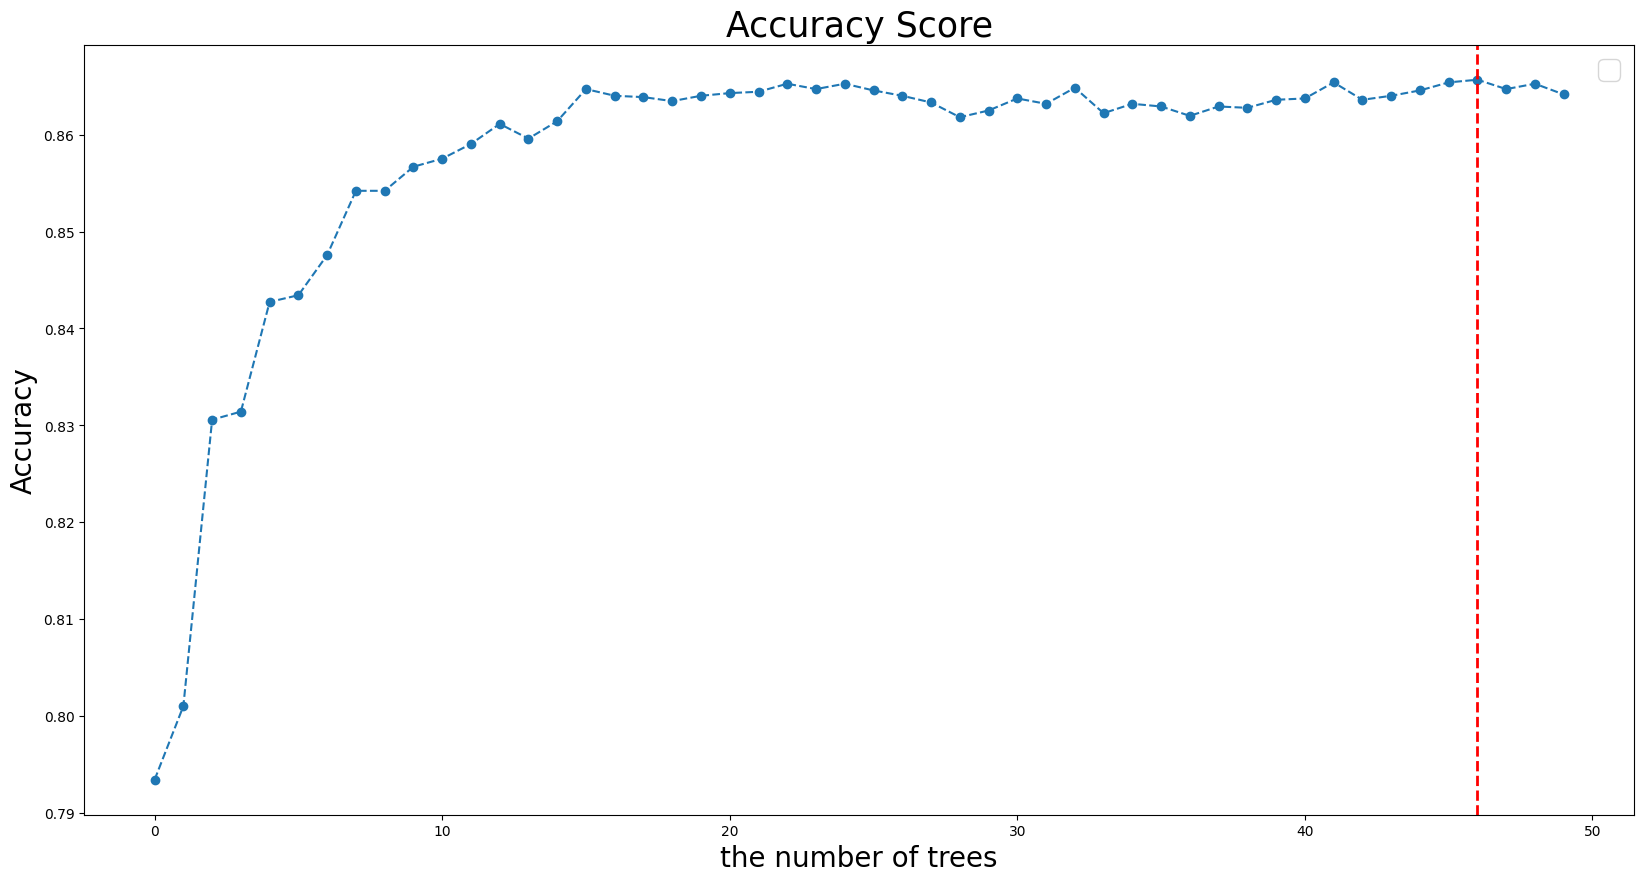

In [161]:
cv_scores = []
estimator_list =[i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                n_jobs=-1,
                                random_state=2021)
    score = cross_val_score(rfc, x_train, y_train, cv=10, scoring = 'accuracy').mean()
    cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the number of trees", fontsize=20 )
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [162]:
print(f"최적의 tree개수:{(cv_scores.index(max(cv_scores)))+1}")
print("\n")  
print("Train set에 대한 성능 (10 fold cross validation)")  
print(f"정확도:{max(cv_scores):0.4f}")  

최적의 tree개수:47


Train set에 대한 성능 (10 fold cross validation)
정확도:0.8657


In [163]:
rfc = RandomForestClassifier(n_estimators=47, n_jobs=-1, random_state=2021)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=47, n_jobs=-1, random_state=2021)

In [164]:
rfc_prediction = rfc.predict(x_test)

In [166]:
rfc_cmatrix = confusion_matrix(y_test, rfc_prediction)

In [167]:
rfc_percentages = (rfc_cmatrix / np.sum(rfc_cmatrix, axis=1)[:, np.newaxis]).round(2) * 100
rfc_percentages

array([[87., 13.],
       [14., 86.]])

<AxesSubplot: >

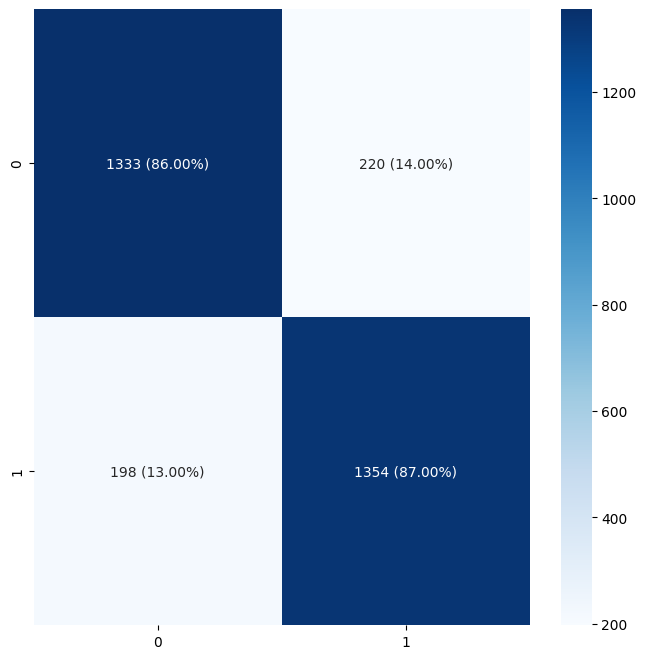

In [169]:
rfc_label = [[f"{c_matrix[i, j]} ({percentages[i,j]:.2f}%)" for j in range(rfc_cmatrix.shape[1])] for i in range(rfc_cmatrix.shape[0])]


rfc_labels = np.asarray(rfc_label)

plt.figure(figsize = (8,8))
sns.heatmap(rfc_cmatrix, annot=rfc_labels, fmt = '', cmap = 'Blues')